# Séance 2 : Champs de deux variables : représentation, gradient, divergence, rotationnel

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Représentation d'un champ de vecteurs : la spirale

On considère le vecteur vitesse $\vec{V}(x,y) = (f_1(x,y), f_2(x,y))$ est donné par
\begin{align}
f_1(x,y) & = y-x, \\
f_2(x,y) & = -x-y.
\end{align}



### Représentation avec `streamplot`

On trace ce champ de vecteur avec `streamplot` qui trace un certain nombre de lignes de courant du champ de vecteur. La colorisation se fait en fonction de la norme de $F$ qui ici est proportionnelle à la distance à l'origine.

Lien : [streamplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html)

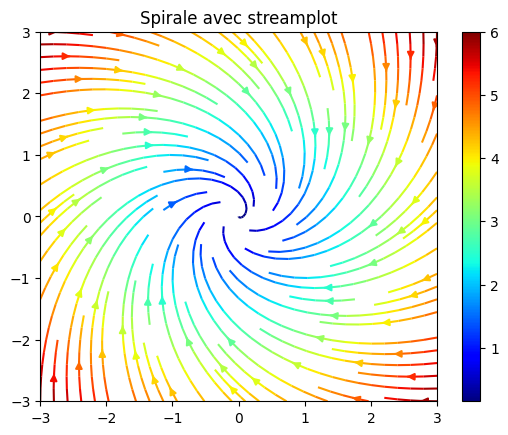

In [2]:
xmin, xmax = -3, 3
ymin, ymax = -3, 3
# X et Y comme vecteurs
x = np.linspace(xmin, xmax, 40)
y = np.linspace(ymin, ymax, 40)
# X et Y comme matrices
X, Y = np.meshgrid(x, y)
cmap = plt.get_cmap('jet')

F1 = Y - X
F2 = - X - Y
Zs = np.sqrt(F1**2 + F2**2)
spirale_streamplot = plt.streamplot(X, Y, F1, F2, color=Zs, cmap=cmap)
plt.colorbar(spirale_streamplot.lines)
plt.title('Spirale avec streamplot');

### Représentation avec `quiver`

On trace maintenant ce champ de vecteur avec `quiver`, qui à partir de points sur une grille trace le vecteur avec une longueur proportionnelle à sa norme.

Lien : [quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)

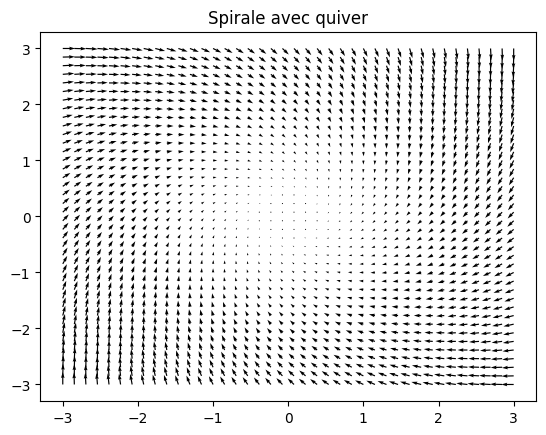

In [3]:
spirale_quiver = plt.quiver(X, Y, F1, F2)
plt.title('Spirale avec quiver');

Contrairement à `streamplot` qui demande une discrétisation relativement fine pour pouvoir déterminer où passent les lignes de courant, `quiver`, qui par défaut remormalise les veceturs pour qu'ils ne se chevauchent pas trop, donne un résultat peu lisible avec cette discrétisation. On peut essayer de coloriser en fonction de la direction du vecteur. On choisit une colorisation cyclique (`hsv`, `twilight`ou `twilight_shifted`) pour ne pas avoir de saut de couleur à l'angle $\pi$.

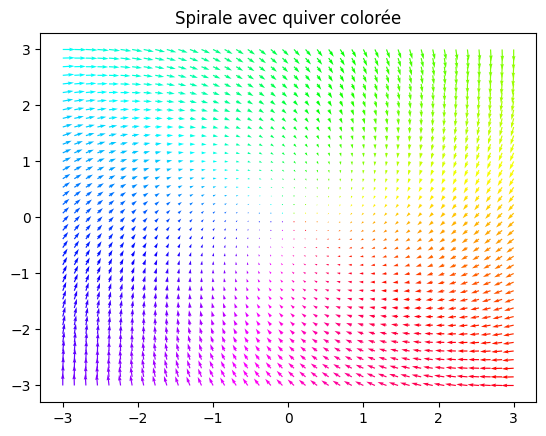

In [4]:
cmap_cyclic = plt.get_cmap('hsv')
spirale_quivercolor = plt.quiver(X, Y, F1, F2, np.angle(F1+1j*F2), cmap=cmap_cyclic)
plt.title('Spirale avec quiver colorée');

On peut aussi tout simplement choisir une grille, plus grossière. 

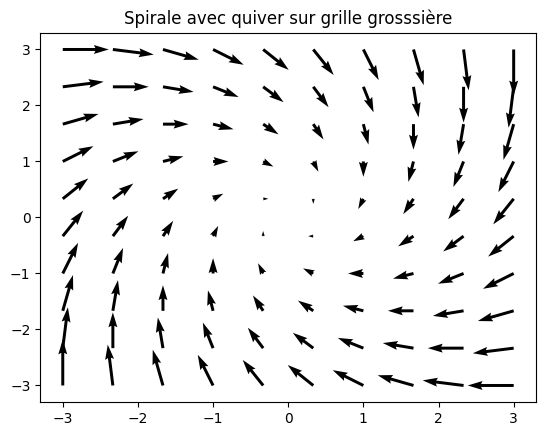

In [5]:
# X et Y comme vecteurs
x2 = np.linspace(xmin, xmax, 10)
y2 = np.linspace(ymin, ymax, 10)
# X et Y comme matrices
X2, Y2 = np.meshgrid(x2, y2)

spirale_quiverscarce = plt.quiver(X2, Y2, Y2 - X2, - X2 - Y2)
plt.title('Spirale avec quiver sur grille grosssière');

## Opérateurs

### Représentation de la fonction

Pour $(x,y)\in[-2,2]^2$, on définit les distances euclidiennes au points $(-1,-1)$ et $(1,1)$ respectivement par
\begin{equation}
d_1(x,y) = \sqrt{(x+1)^2+(y+1)^2} \text{ et } d_2(x,y) = \sqrt{(x-1)^2+(y-1)^2}.
\end{equation}
On considère un nouveau champ de vecteurs donné par
\begin{align}
g_1(x,y) & = \frac{-(y+1)}{d_1^{1.5}(x,y)} + \frac{x-1}{d_2^{1.5}(x,y)}, \\
g_2(x,y) & = \frac{x+1}{d_1^{1.5}(x,y)} + \frac{y-1}{d_2^{1.5}(x,y)}.
\end{align}

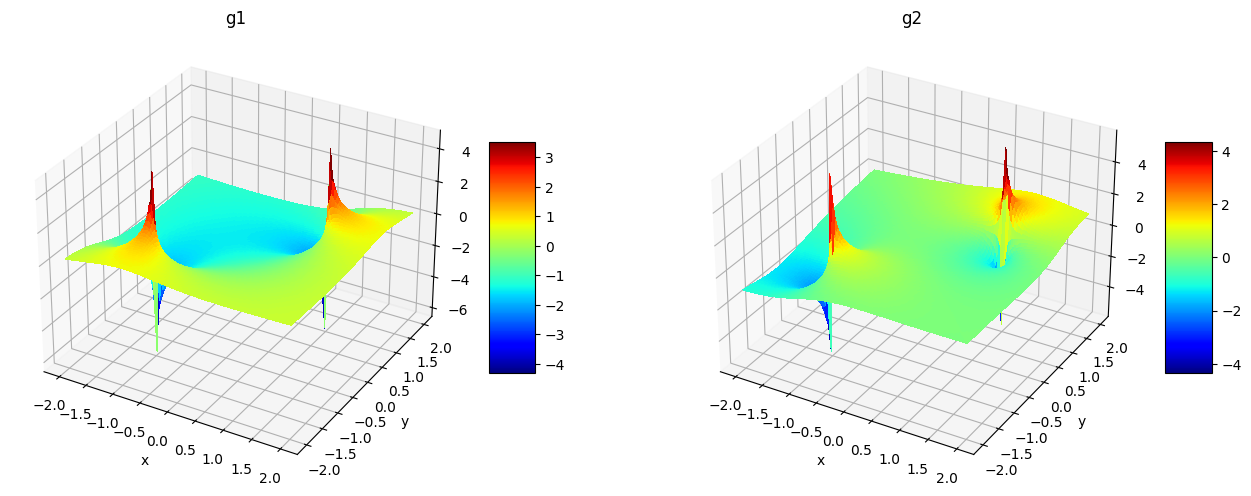

In [6]:
xmin, xmax = -2, 2
ymin, ymax = -2, 2
nb_points = 100
# X et Y comme vecteurs
x = np.linspace(xmin, xmax, nb_points)
y = np.linspace(ymin, ymax, nb_points)
# X et Y comme matrices
X, Y = np.meshgrid(x, y)
eps = np.finfo(float).eps
cmap = plt.get_cmap('jet')

d1 = np.sqrt((X+1)**2+(Y+1)**2) # distance 1 
d2 = np.sqrt((X-1)**2+(Y-1)**2) # distance 2 

g1 = -(Y+1)/d1**1.5 + (X-1)/d2**1.5
g2 = (X+1)/d1**1.5 + (Y-1)/d2**1.5

plt.figure(1,figsize=(16,6))
plt.subplot(1,2,1,projection='3d')
ax1 = plt.gca()
surff = ax1.plot_surface(X, Y, g1, rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('g1')
plt.subplot(1,2,2,projection='3d')
ax2 = plt.gca()
surff = ax2.plot_surface(X, Y, g2, rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('g2');

### Opérateurs en utilisant la grille

En général en calcul scientifique, on ne dispose des valeurs de la fonction que sur la grille, et c'est à partir de ces valeurs, et uniquement à partir d'elles, que l'on calcule gradients et autre opérateurs. C'est ce qui est fait ci-dessous en choisissant de centrer les dérivées sur une sous-grille ne prenant pas en compte les points du bord du domaine. En fonction des applications, on peut faire d'autres choix : décentrage des dérivées, choix des grilles décalées pour la représentation des opérateurs...

#### Gradient

Définissons une fonction gradient que l'on utilisera pour représenter séparément $\nabla g_1$ et $\nabla g_2$.

Au point de coordonnées $(x,y)$, et pour un pas de grille $dx$ en $x$ et $dy$ en $y$, on a
\begin{equation}
\frac{\partial f}{\partial x}(x,y) \simeq \frac{f(x+dx,y)-f(x-dx,y)}{2dx} \text{ et } \frac{\partial f}{\partial y}(x,y) \simeq \frac{f(x,y+dy)-f(x,y-dy)}{2dy}.
\end{equation}
<font color=red>Attention : les décalages des grilles sont contre-intuitifs. Les abscisses correspondant aux lignes, une translation en abscisse correspond à décaler le deuxième indice... et une translation en ordonnées correspond à décaler le premier indice.</font>

Enfin, on prend une échelle log car il y a clairement de fortes variations localisées.

(98, 98)


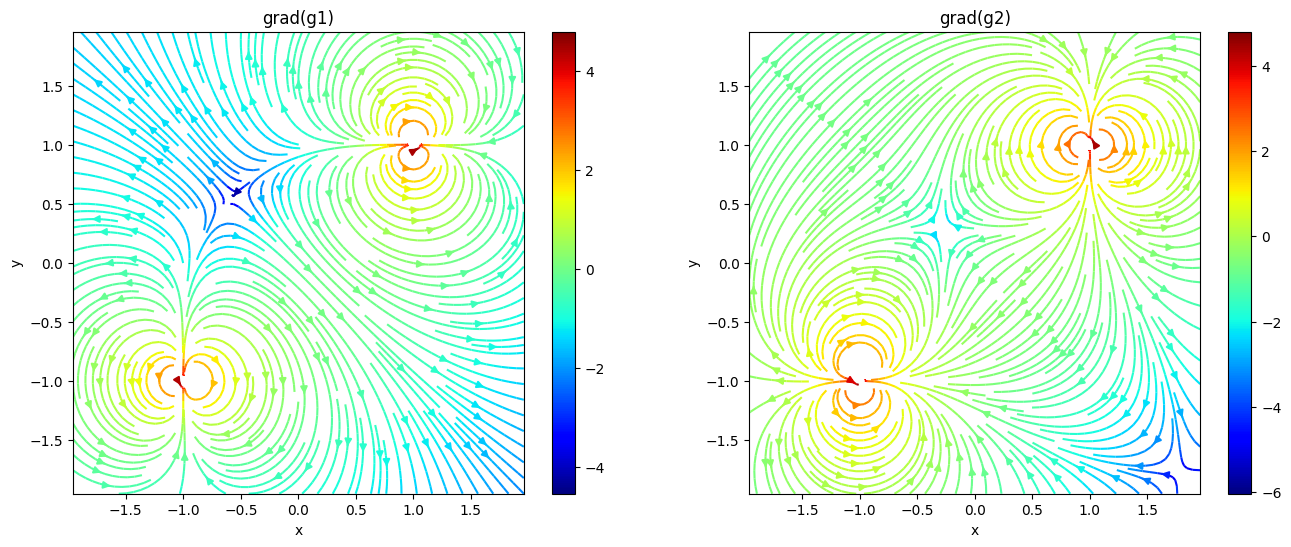

In [7]:
dx = (xmax-xmin)/nb_points
dy = (ymax-ymin)/nb_points

def grad(f):
    return (f[1:-1,2:]-f[1:-1,:-2])/(2*dx), (f[2:,1:-1]-f[:-2,1:-1])/(2*dy)

gradg1 = grad(g1)
gradg2 = grad(g2)
Z1 = np.sqrt(gradg1[0]**2 + gradg1[1]**2)
Z2 = np.sqrt(gradg2[0]**2 + gradg2[1]**2)

print(np.shape(X[1:-1,1:-1]))

plt.figure(1,figsize=(16,6))
plt.subplot(1,2,1)
surf1 = plt.streamplot(X[1:-1,1:-1], Y[1:-1,1:-1], gradg1[0], gradg1[1], color=np.log(np.abs(Z1)), cmap=cmap, density = 2)
plt.colorbar(surf1.lines)
plt.xlabel('x')
plt.ylabel('y')
plt.title('grad(g1)')
plt.subplot(1,2,2)
surf2 = plt.streamplot(X[1:-1,1:-1], Y[1:-1,1:-1], gradg2[0], gradg2[1], color=np.log(np.abs(Z2)), cmap=cmap, density = 2)
plt.colorbar(surf2.lines)
plt.xlabel('x')
plt.ylabel('y')
plt.title('grad(g2)');

### Divergence

Calculons maintenant la divergence, en adoptant la même logique de centrage que pour le gradient.

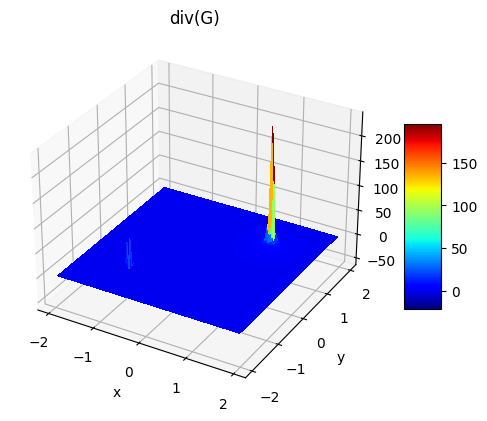

In [8]:
def div(f1, f2):
    return grad(f1)[0] + grad(f2)[1]

d = div(g1, g2)

plt.subplot(projection='3d')
ax = plt.gca()
surff = ax.plot_surface(X[1:-1,1:-1], Y[1:-1,1:-1], d, rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('div(G)');

#### Rotationnel

Et enfin le rotationnel, défini ici en dimension 2 comme $\nabla\times f = \dfrac{\partial f_2}{\partial x} -\dfrac{\partial f_1}{\partial y}$.

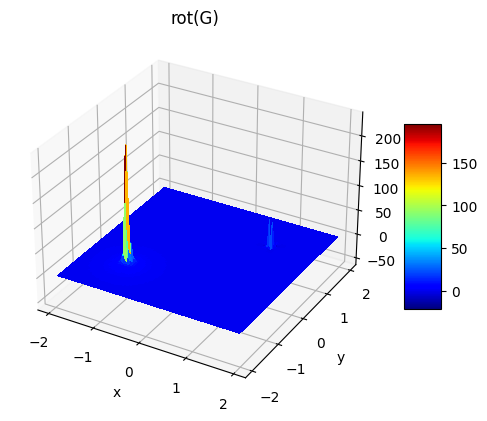

In [9]:
def rot(f1, f2):
    return grad(f2)[0] - grad(f1)[1]

r = rot(g1, g2)

plt.subplot(projection='3d')
ax = plt.gca()
surff = ax.plot_surface(X[1:-1,1:-1], Y[1:-1,1:-1], r, rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('rot(G)');

#### Opérateurs utilisant la définition de la fonction

Dans le TP présent, on a en fait l'expression des fonctions que l'on trace. On pourrait évidemment tracer les valeurs des fonctions gradient, divergence et rotationnel que l'on aurait calculées à la main (ou en utilisant une librairie de différentiation automatique de python). On peut aussi utiliser à nouveau que les dérivées sont des limites de taux d'accroissement mais sans que le pas soit contraint par celui de la grille. On peut donc redéfinir les opérateurs comme ci-dessous, où on n'a plus absolument besoin de décentrer les dérivées pour des raison d'affichage sur une même grille.   

In [10]:
def dist1(x, y):
    return np.sqrt((x+1)**2+(y+1)**2)

def dist2(x, y):
    return np.sqrt((x-1)**2+(y-1)**2)

def g1_func(x, y):
    return -(y+1)/dist1(x,y)**1.5 + (x-1)/dist2(x,y)**1.5

def g2_func(x, y): 
    return (x+1)/dist1(x,y)**1.5 + (y-1)/dist2(x,y)**1.5

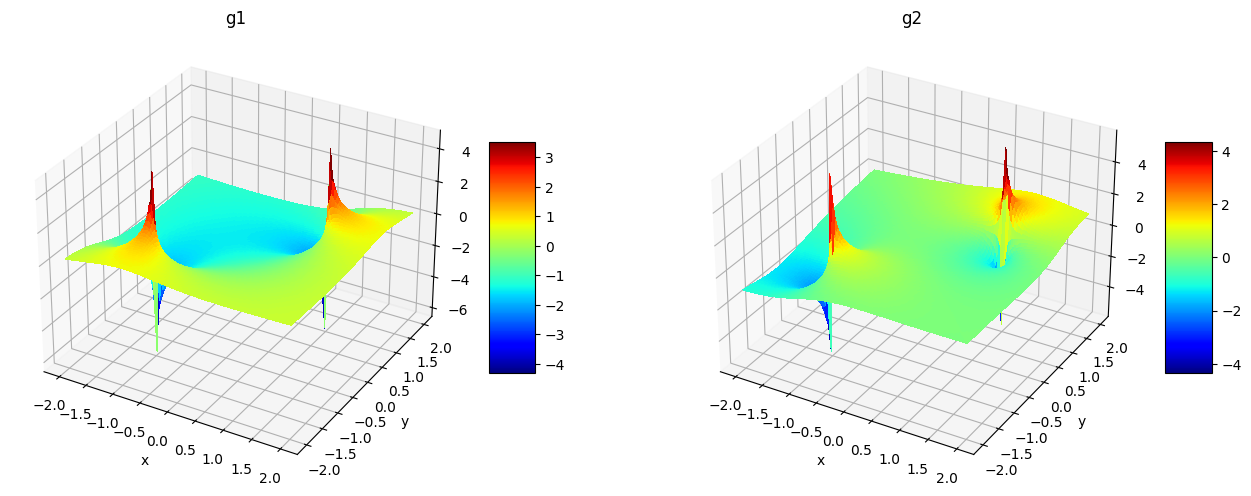

In [11]:
plt.figure(1,figsize=(16,6))
plt.subplot(1,2,1,projection='3d')
ax1 = plt.gca()
surff = ax1.plot_surface(X, Y, g1_func(X, Y), rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('g1')
plt.subplot(1,2,2,projection='3d')
ax2 = plt.gca()
surff = ax2.plot_surface(X, Y, g2_func(X, Y), rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('g2');

#### Gradient

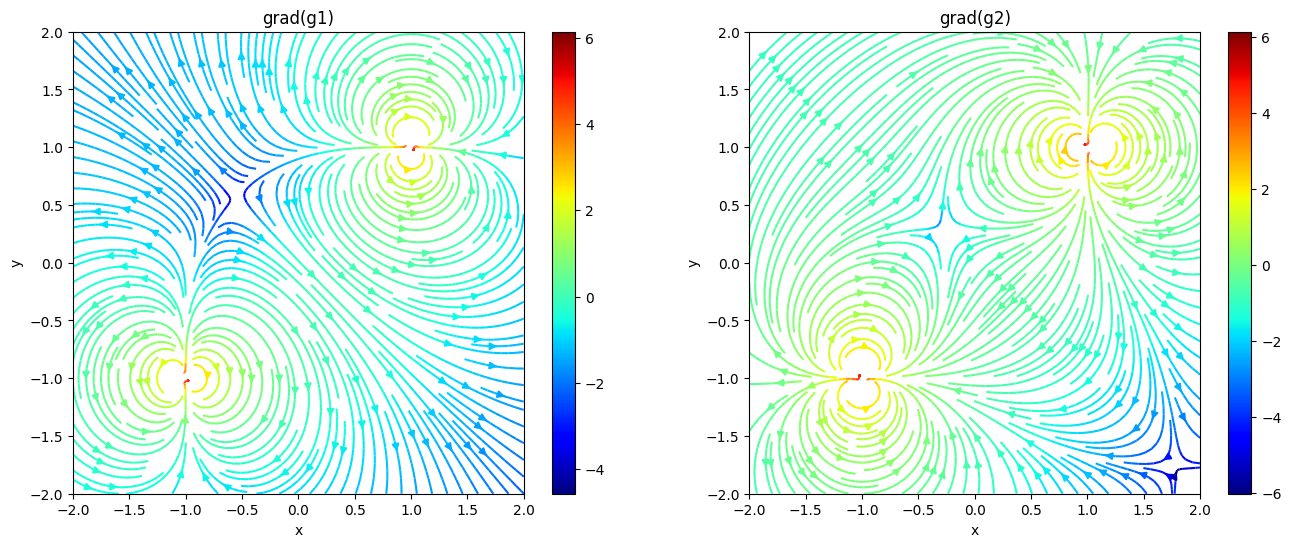

In [12]:
def gradh(func, h, X, Y):
    return (func(X+h, Y) - func(X, Y)) / h, (func(X, Y+h) - func(X, Y)) / h 

h = 1.e-6 # pas sensiblement plus petit que dx

gradh1 = gradh(g1_func, h, X, Y)
gradh2 = gradh(g2_func, h, X, Y)
Zh1 = np.sqrt(gradh1[0]**2 + gradh1[1]**2)
Zh2 = np.sqrt(gradh2[0]**2 + gradh2[1]**2)

plt.figure(1,figsize=(16,6))
plt.subplot(1,2,1)
surf1 = plt.streamplot(X, Y, gradh1[0], gradh1[1], color=np.log(np.abs(Zh1)), cmap=cmap, density = 2)
plt.colorbar(surf1.lines)
plt.xlabel('x')
plt.ylabel('y')
plt.title('grad(g1)')
plt.subplot(1,2,2)
surf2 = plt.streamplot(X, Y, gradh2[0], gradh2[1], color=np.log(np.abs(Zh2)), cmap=cmap, density = 2)
plt.colorbar(surf2.lines)
plt.xlabel('x')
plt.ylabel('y')
plt.title('grad(g2)');

Retraçons côte-à-côte pour comparer les deux approches.

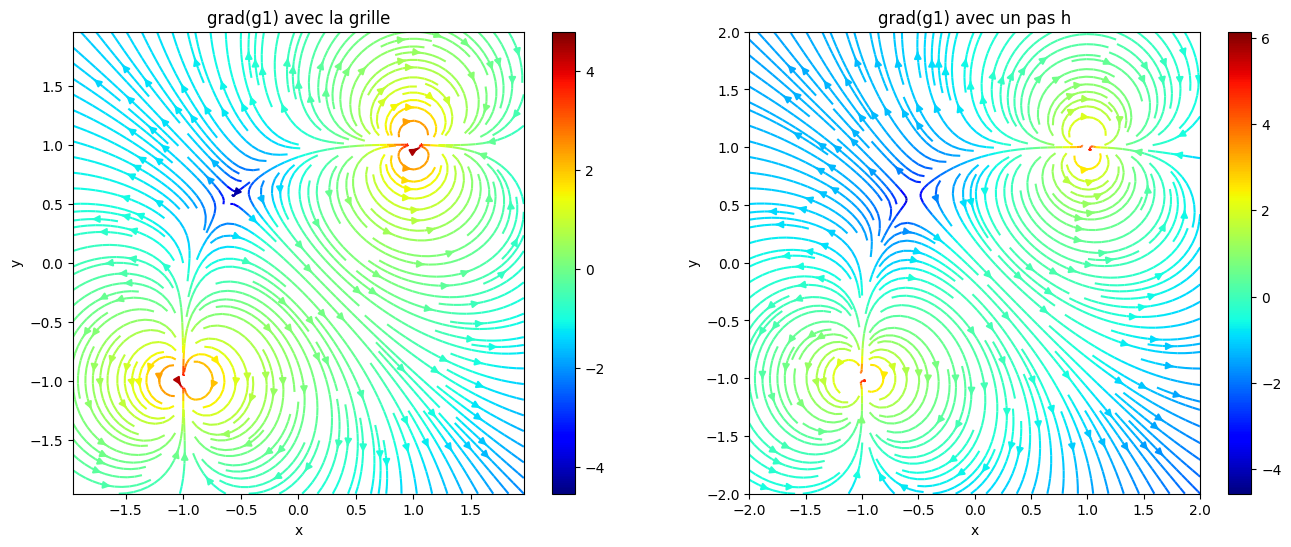

In [13]:
plt.figure(1,figsize=(16,6))
plt.subplot(1,2,1)
surf1 = plt.streamplot(X[1:-1,1:-1], Y[1:-1,1:-1], gradg1[0], gradg1[1], color=np.log(np.abs(Z1)), cmap=cmap, density = 2)
plt.colorbar(surf1.lines)
plt.xlabel('x')
plt.ylabel('y')
plt.title('grad(g1) avec la grille')
plt.subplot(1,2,2)
surf2 = plt.streamplot(X, Y, gradh1[0], gradh1[1], color=np.log(np.abs(Zh1)), cmap=cmap, density = 2)
plt.colorbar(surf2.lines)
plt.xlabel('x')
plt.ylabel('y')
plt.title('grad(g1) avec un pas h');

Le pas $h$ étant choisi très petit, le rendu est évidemment meilleur avec le pas $h$, mais il nécessite la connaissance de la fonction, qui n'est pas toujours disponible. Il en sera de même pour divergence et rotationnel comparés aussi ci-dessous.

#### Divergence

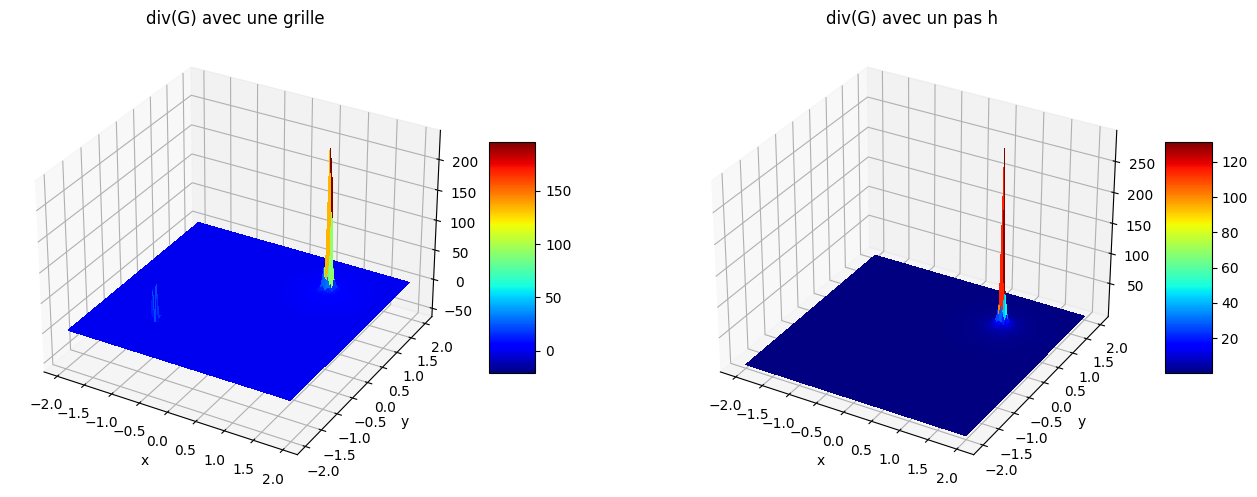

In [14]:
def divh(func1, func2, h, X, Y):
    return (func1(X+h, Y) - func1(X, Y)) / h + (func2(X, Y+h) - func2(X, Y)) / h 

dd = divh(g1_func, g2_func, h, X, Y)

plt.figure(1,figsize=(16,6))
plt.subplot(1,2,1,projection='3d')
ax = plt.gca()
surff = ax.plot_surface(X[1:-1,1:-1], Y[1:-1,1:-1], d, rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('div(G) avec une grille');

plt.subplot(1,2,2, projection='3d')
ax = plt.gca()
surff = ax.plot_surface(X, Y, dd, rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('div(G) avec un pas h');

#### Rotationnel

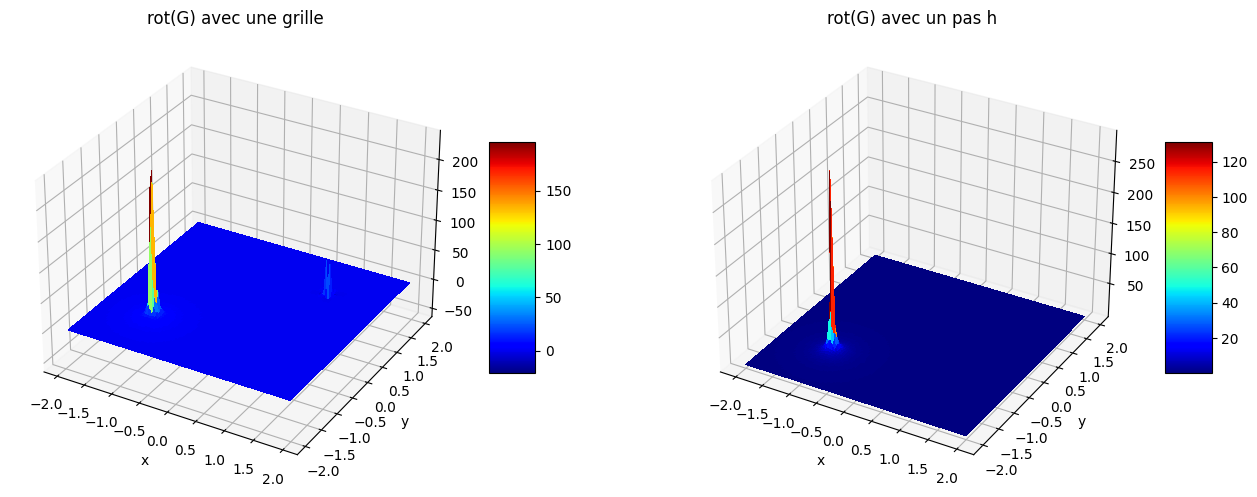

In [15]:
def roth(func1, func2, h, X, Y):
    return (func2(X+h, Y) - func2(X, Y)) / h - (func1(X, Y+h) - func1(X, Y)) / h 

rr = roth(g1_func, g2_func, h, X, Y)

plt.figure(1,figsize=(16,6))
plt.subplot(1,2,1,projection='3d')
ax = plt.gca()
surff = ax.plot_surface(X[1:-1,1:-1], Y[1:-1,1:-1], r, rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('rot(G) avec une grille');

plt.subplot(1,2,2, projection='3d')
ax = plt.gca()
surff = ax.plot_surface(X, Y, rr, rstride=1, cstride=1, 
                        cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('rot(G) avec un pas h');